In [1]:
!pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install seaborn


In [4]:
!pip install pandas


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.isnull().any()

gender                         False
race_ethnicity                 False
parental_level_of_education    False
lunch                          False
test_preparation_course        False
math_score                     False
reading_score                  False
writing_score                  False
dtype: bool

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
print("Categories in gender: ",end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories inparental_level_of_education: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch: ",end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course: ",end=" ")
print(df['test_preparation_course'].unique())


Categories in gender:  ['female' 'male']
Categories in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories inparental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:  ['standard' 'free/reduced']
Categories in test_preparation_course:  ['none' 'completed']


In [11]:
numerical_category=[feature for feature in df.columns if df[feature].dtype !='O']
print("Numerical features are:",numerical_category)

categorical_feature=[feature for feature in df.columns if df[feature].dtype =='O']
print("Categorical features are:",categorical_feature)

Numerical features are: ['math_score', 'reading_score', 'writing_score']
Categorical features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
maths_full=df[df['math_score']==100]['average_score'].count()
print("No of student got full in Maths:",maths_full)

reading_full=df[df['reading_score']==100]['average_score'].count()
print("No of student got full in reading:",reading_full)

writing_full=df[df['writing_score']==100]['average_score'].count()
print("No of student got full in writing:",writing_full)

No of student got full in Maths: 7
No of student got full in reading: 17
No of student got full in writing: 14


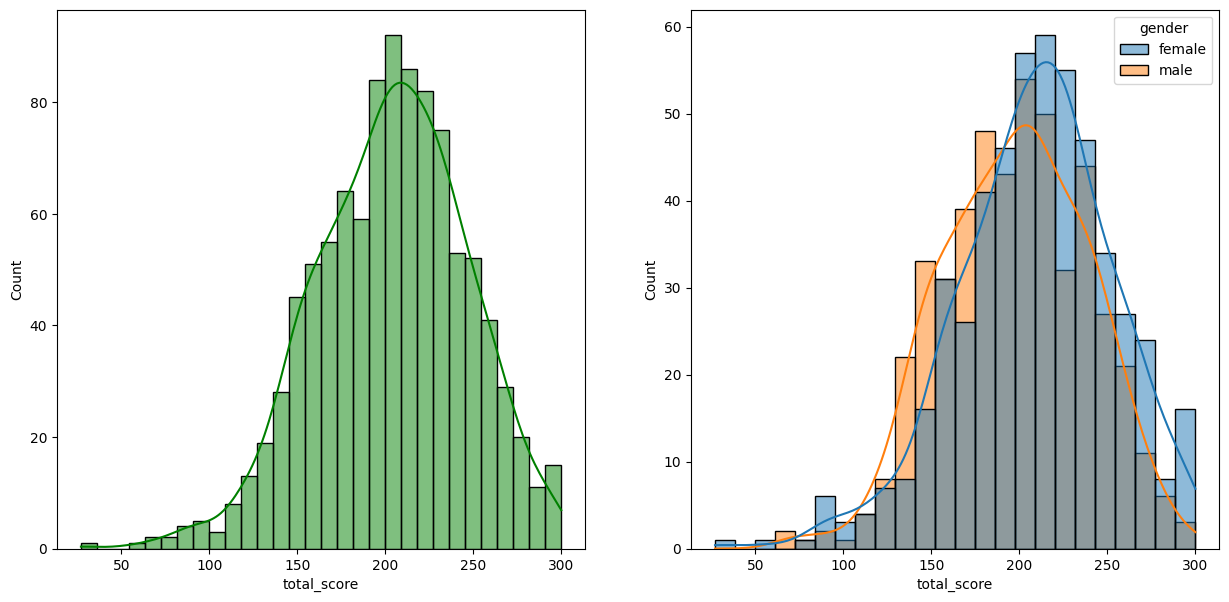

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

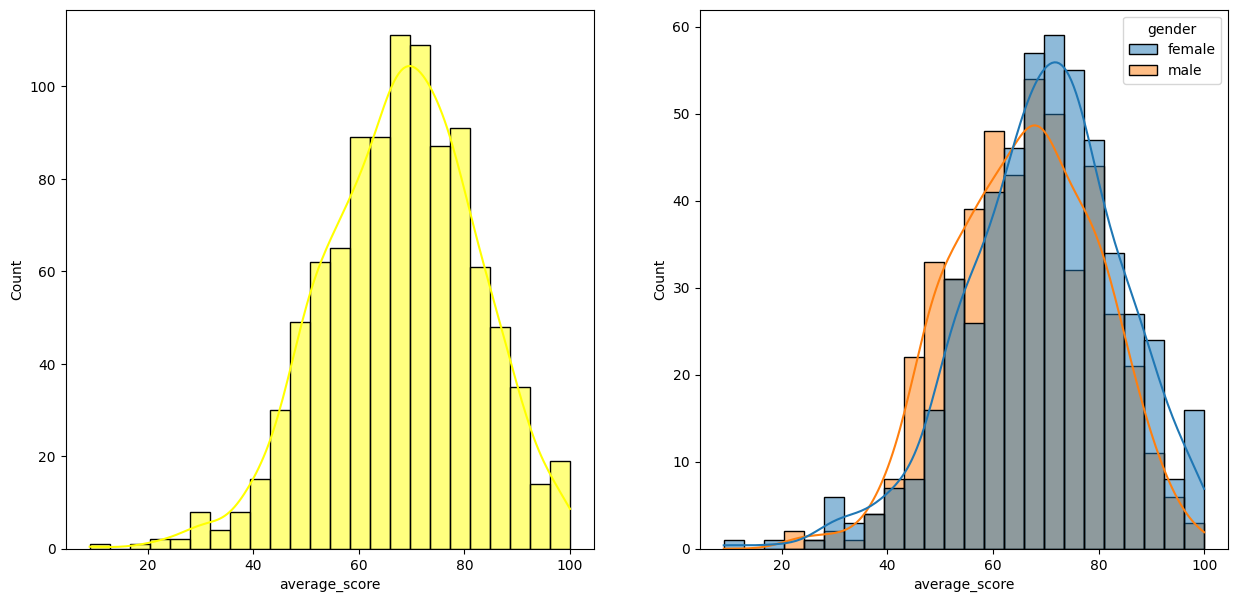

In [28]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,color='yellow')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

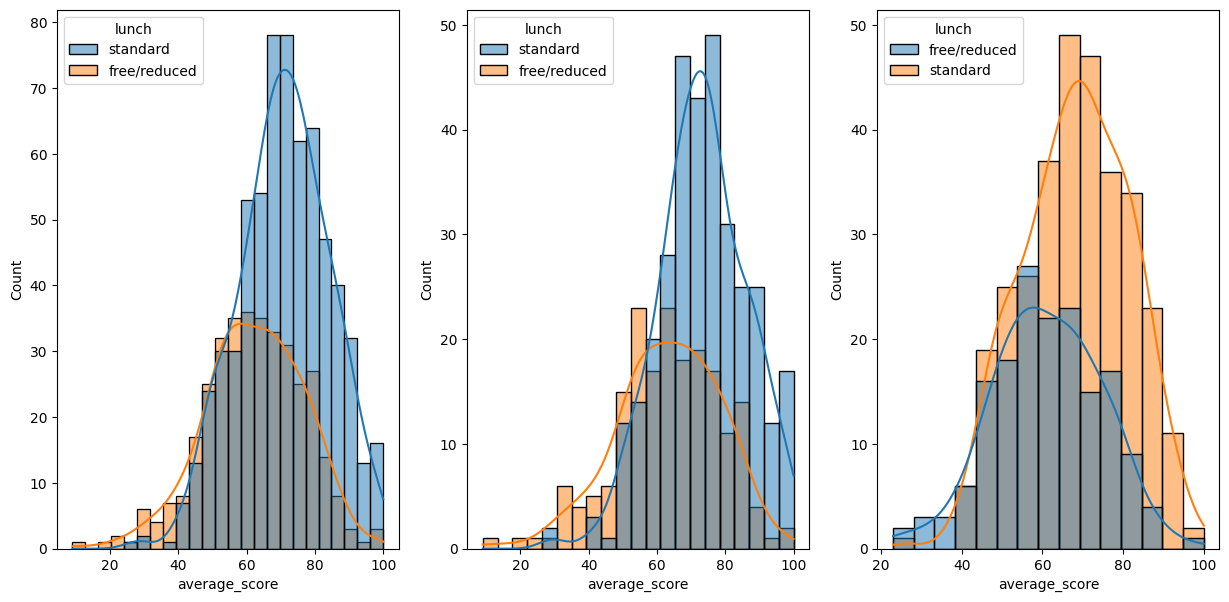

In [32]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

### From here we can conclude Students take Standard lunch perform well in exams

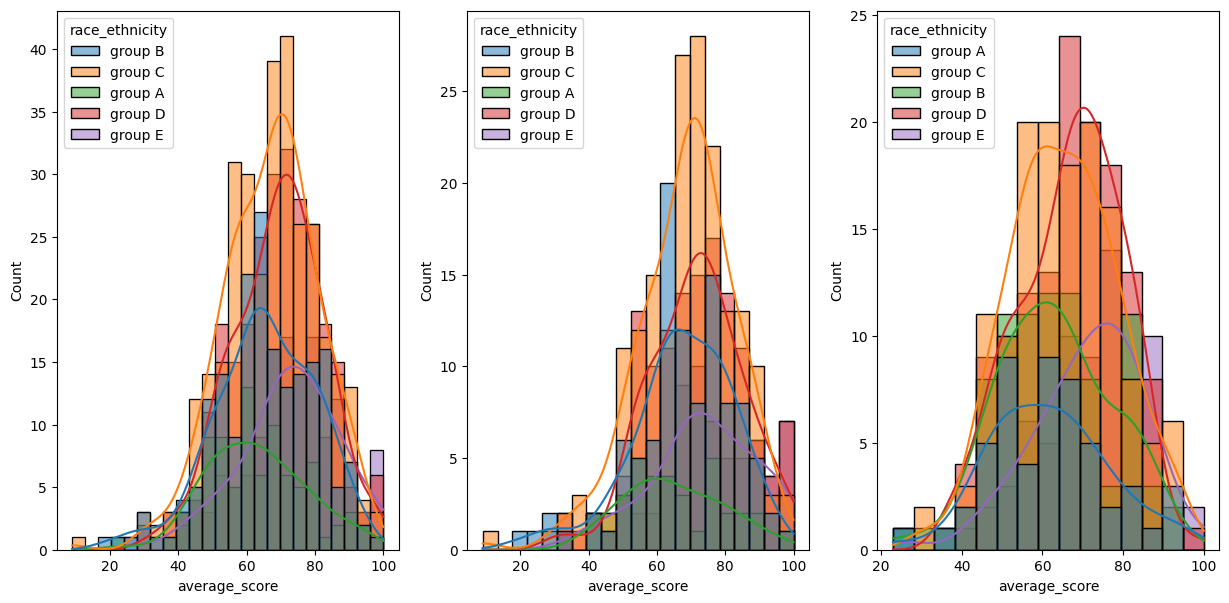

In [38]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

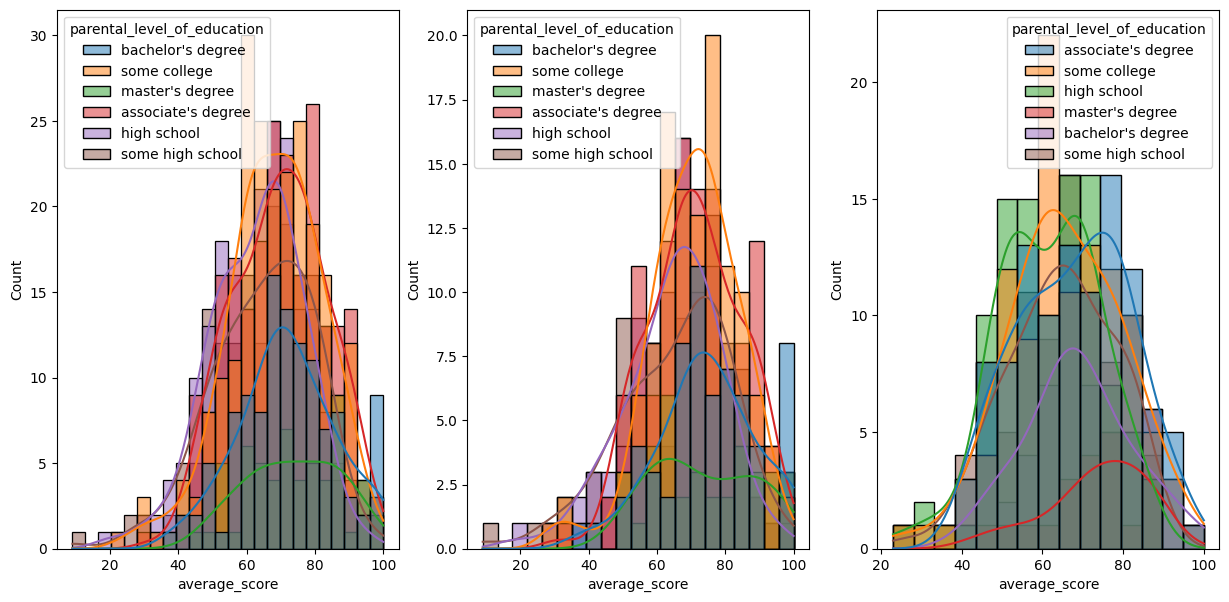

In [40]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

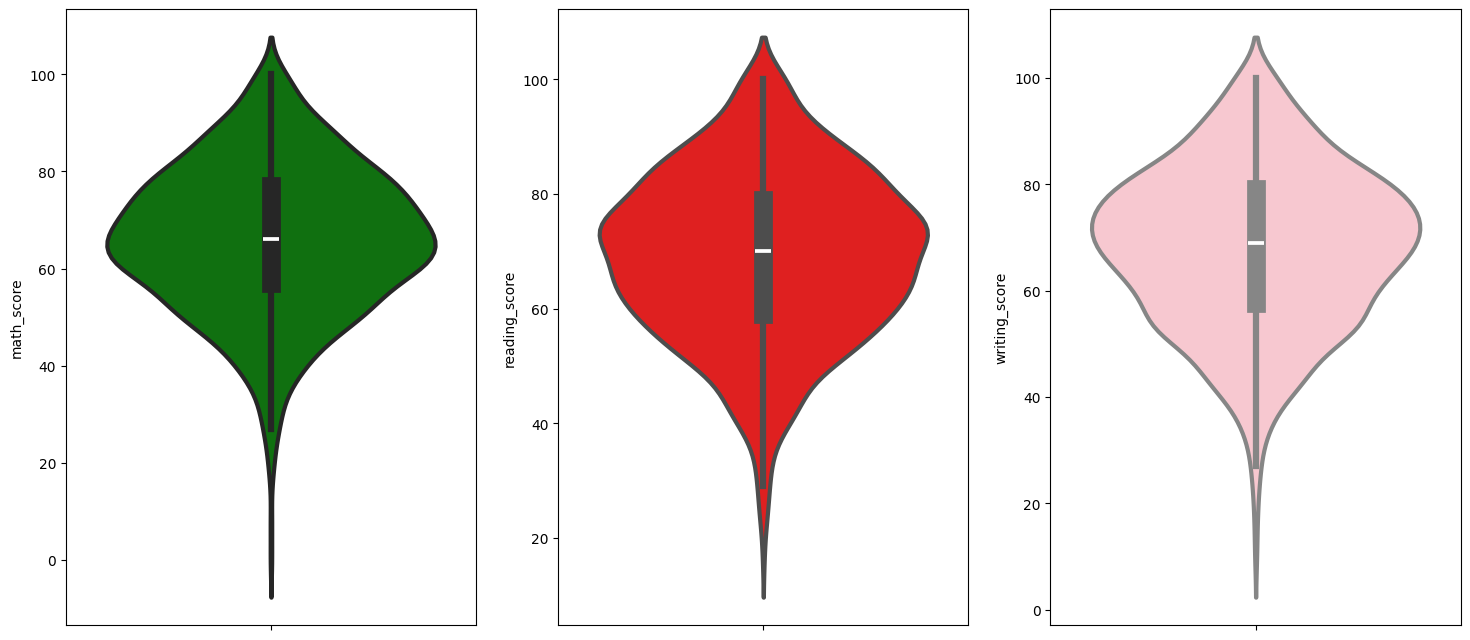

In [43]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(1,3,1)
sns.violinplot(y='math_score',data=df,color='green',linewidth=3)
plt.subplot(1,3,2)
sns.violinplot(y='reading_score',data=df,color='red',linewidth=3)
plt.subplot(1,3,3)
sns.violinplot(y='writing_score',data=df,color='pink',linewidth=3)
plt.show()

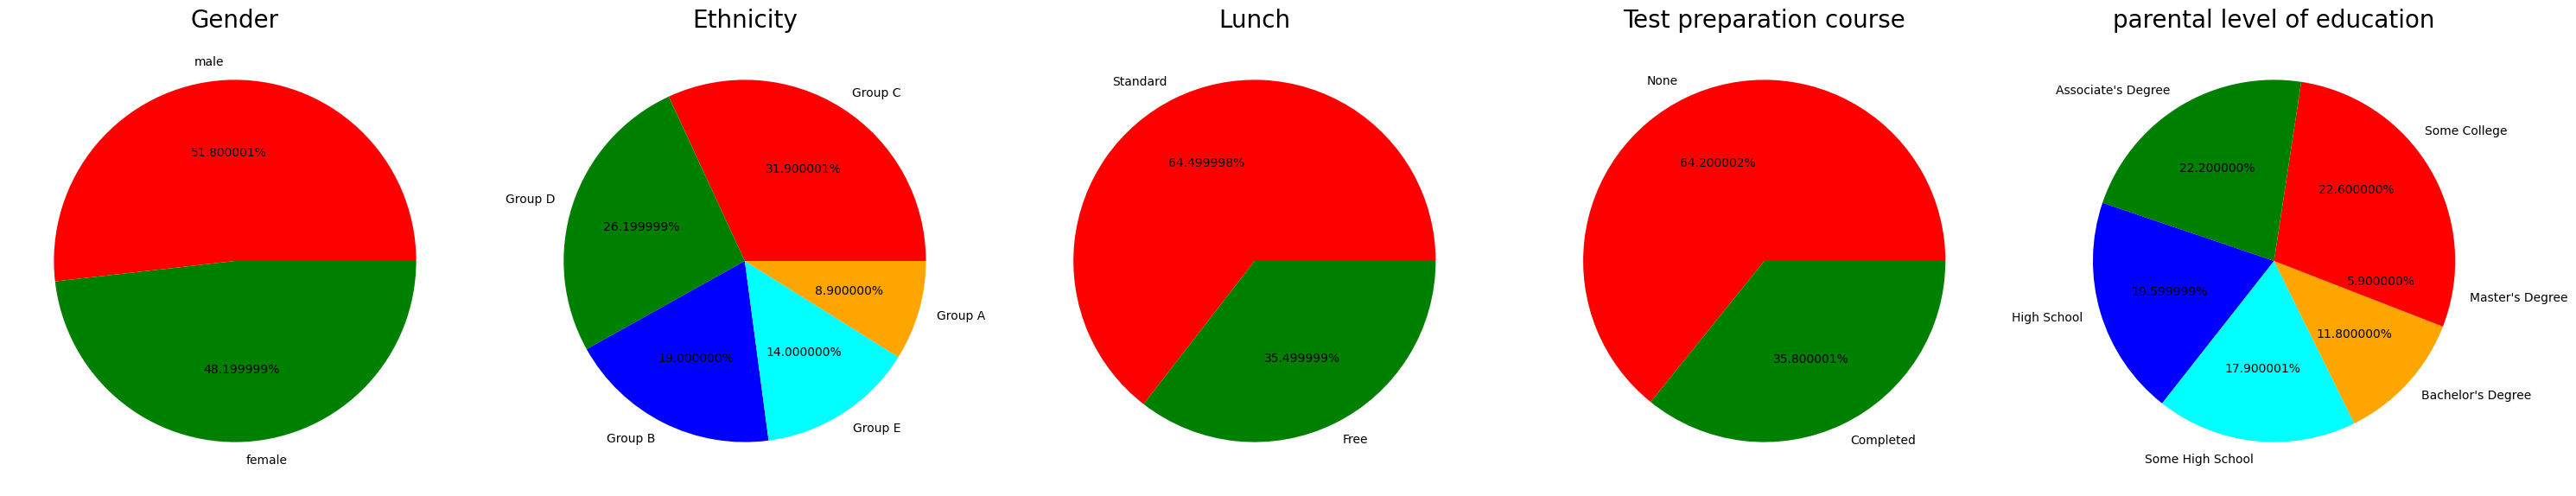

In [56]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='male','female'
colors=['red','green']
plt.pie(size,labels=labels,colors=colors,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C', 'Group D','Group B','Group E','Group A'
colors=['red', 'green', 'blue', 'cyan','orange']
plt.pie(size,labels=labels,colors=colors,autopct='%2f%%')
plt.title('Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Lunch',fontsize=20)

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size,labels=labels,colors=colors,autopct='%2f%%')
plt.title('Test preparation course',fontsize=20)

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size,labels=labels,colors=colors,autopct='%2f%%')
plt.title('parental level of education',fontsize=20)

plt.tight_layout()
plt.grid()
plt.show()

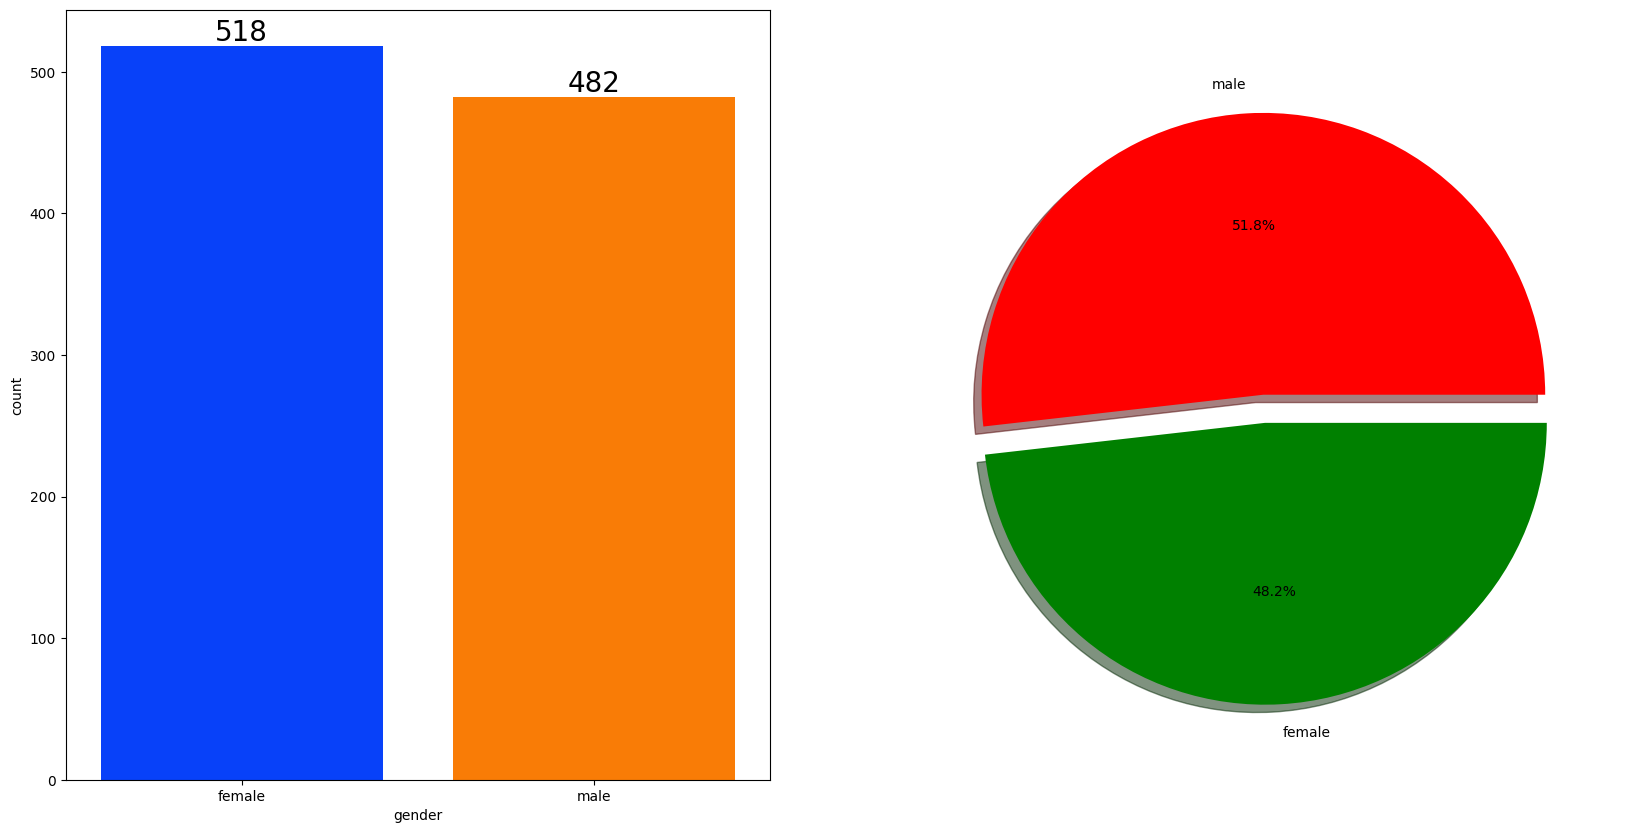

In [59]:
## Showing how the gender in divided and based of gender is there is any impact on student performance

#Firstly ploting the distribution
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['male','female'],colors=['red','green'],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
plt.show()

In [63]:
gender_group=df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


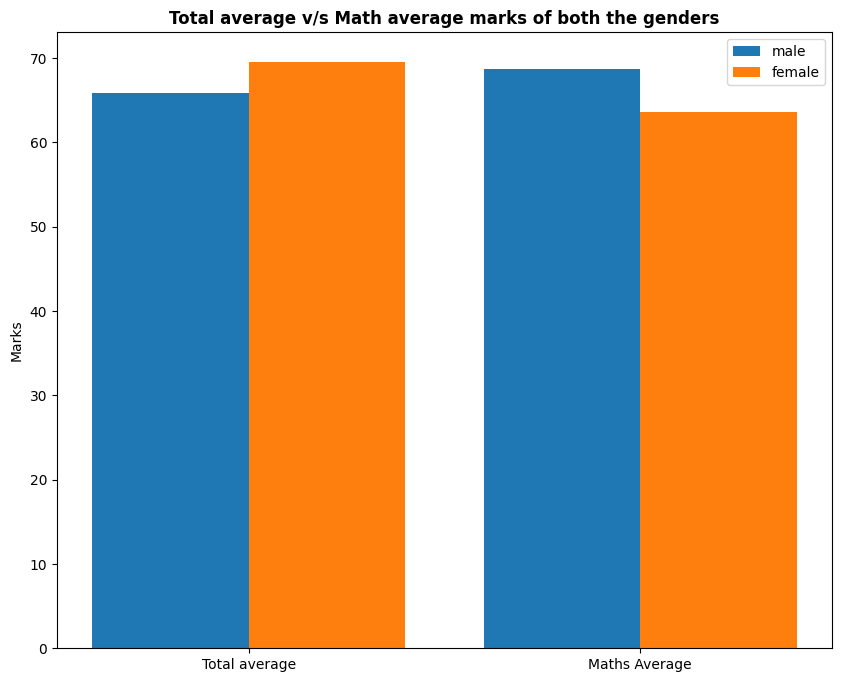

In [64]:

plt.figure(figsize=(10,8))

X=['Total average','Maths Average']
female_scores=[gender_group['average_score'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average_score'][1],gender_group['math_score'][1]]

X_axis=np.arange(len(X))
plt.bar(X_axis -0.2,male_scores,0.4,label='male')
plt.bar(X_axis +0.2,female_scores,0.4,label='female')
plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

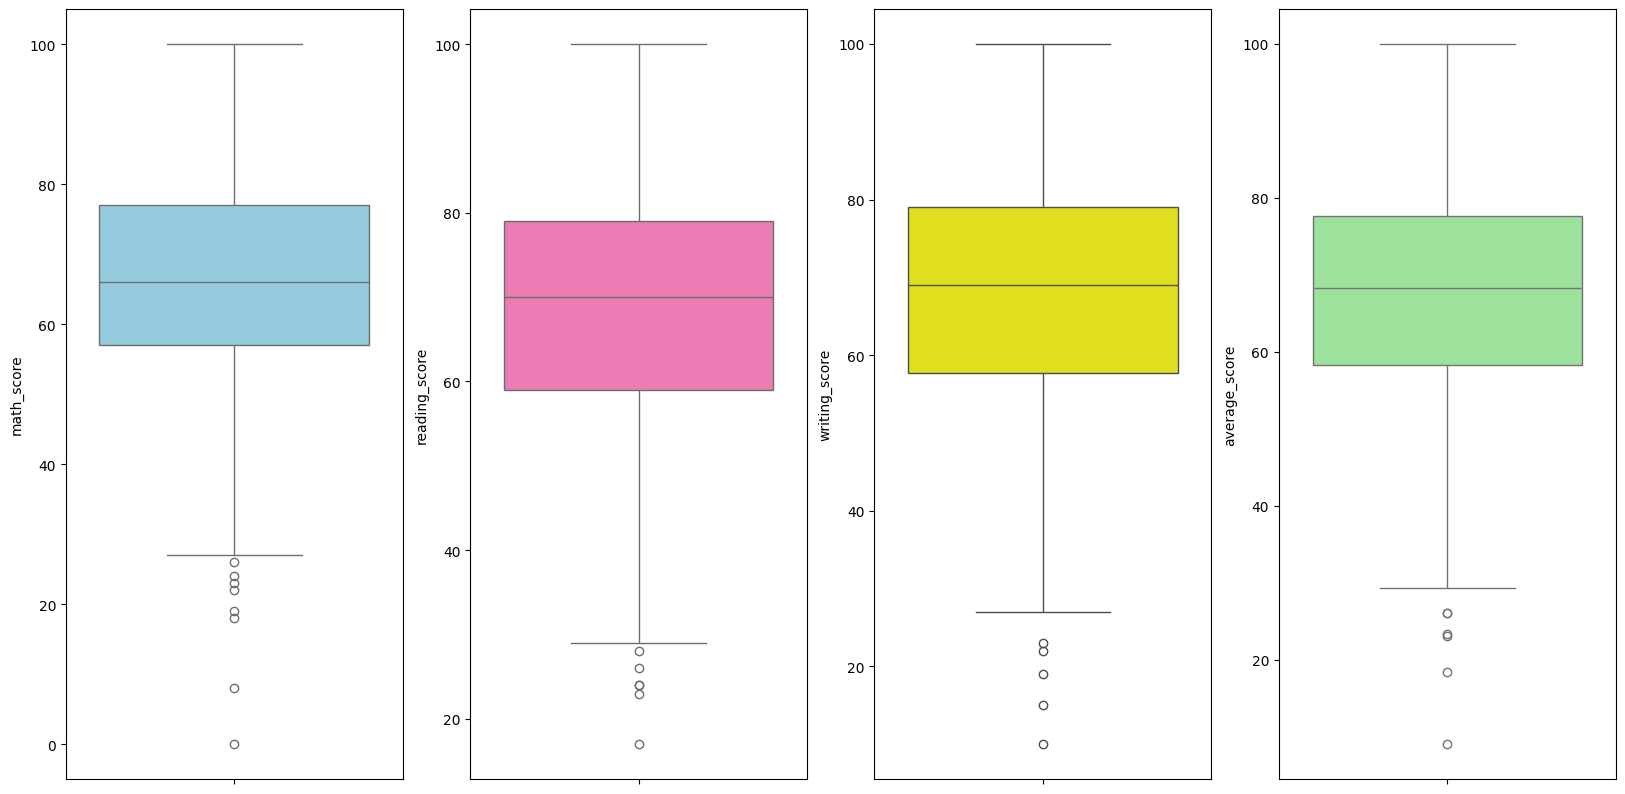

In [66]:
plt.subplots(1,4,figsize=(20,10))

plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

In [67]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [72]:
df.to_csv('data/updated_stud.csv',index=False)

In [71]:
df.shape

(1000, 10)